In [1]:

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes

import seaborn as sns

def modify_rc():
    mpl.rcParams['figure.dpi'] = 250
    mpl.rc('text', usetex=True)
    mpl.rc('text.latex', preamble=r'''\usepackage{bm}
\usepackage{xcolor}
\usepackage{mathrsfs, amsmath, amssymb, amsthm, amsxtra}''')
    #mpl.rcParams['text.latex.preamble']=[r"\usepackage{bm}", r"\usepackage{xcolor}"]
    mpl.rc('font', family='serif', serif='Computer Modern', size=8)

modify_rc()
modify_rc()

def pretty_axes(axx):
    axx.yaxis.set_ticks_position('both')
    axx.xaxis.set_ticks_position('both')
    axx.tick_params(axis='y', direction='in')
    axx.tick_params(axis='y', direction='in', which='minor')
    axx.tick_params(axis='x', direction='in')
    axx.tick_params(axis='x', direction='in', which='minor')
    axx.grid(linestyle=':', alpha=0.3, linewidth=0.5, color='gray')

# import healpy as hp
from astropy.io import fits
from astropy.wcs import WCS
# import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from reproject import reproject_interp
from astropy.wcs.utils import skycoord_to_pixel
from scipy.ndimage import map_coordinates

import healpy as hp

import cmasher as cmr

import utils



[pop-os:174736] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.pop-os.1000/jf.0/3678863360/shared_mem_cuda_pool.pop-os could be created.
[pop-os:174736] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [61]:
import pysm3 as sm
import pysm3.units as u

In [8]:
NSIDE = 512
print(3*NSIDE - 1)

1535


In [10]:
sky11 = sm.Sky(nside=NSIDE, preset_strings=['d11'])
iqu11 = sky11.components[0].f_real
IQU11 = sm.utils.log_pol_tens_to_map(iqu11)

/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi
No physical unit associated with file /home/m/.astropy/cache/download/url/5eef745c2c721c70901c600cc4f1ba27/contents
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi


generating monofractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]


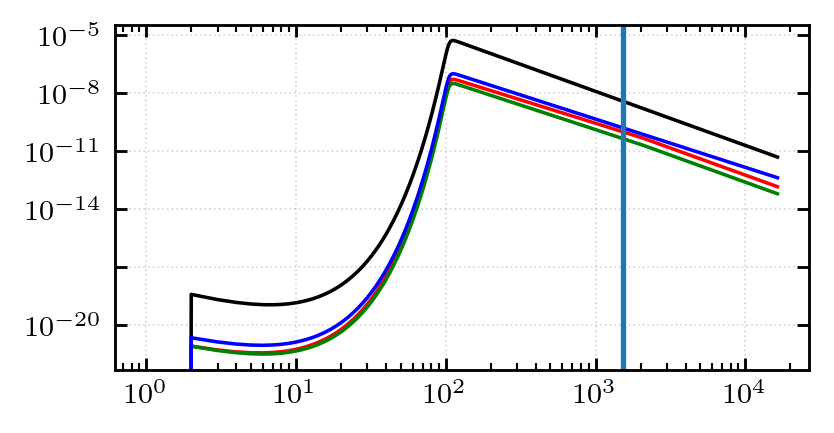

In [9]:
Cls = sky11.components[0].small_scale_cl
ell = np.arange(len(Cls[0]))
fig, ax = plt.subplots(1, 1, figsize=(3.5, 1.75), dpi=256)
ax.plot(ell, Cls[0], linestyle='-', color='black', linewidth=1.0)
ax.plot(ell, Cls[1], linestyle='-', color='red', linewidth=1.0)
ax.plot(ell, Cls[2], linestyle='-', color='green', linewidth=1.0)
ax.plot(ell, Cls[3], linestyle='-', color='blue', linewidth=1.0)
utils.pretty_axes(ax)
ax.loglog()
ax.axvline(3*NSIDE-1)

In [65]:

Hs = [0.01, 0.1, 0.25, 0.5, 0.75]
i, q, u = [], [], []
I, Q, U = [], [], []
ranges = [(-2.5, 2.5), (-0.25, 0.25), (-0.25, 0.25)]
ranges2 = [(0, 5), (-0.5, 0.5), (-0.5, 0.5)]

for H in Hs:
    model = sm.ModifiedBlackBodyRealization(
        "dust_gnilc/raw/gnilc_dust_largescale_template_logpoltens_alm_nside2048_lmax1024_complex64.fits.gz",
        "353 GHz",
        "dust_gnilc/raw/gnilc_dust_temperature_modulation_alms_lmax768.fits.gz",
        "dust_gnilc/raw/gnilc_dust_polarization_modulation_alms_lmax768.fits.gz",
        "dust_gnilc/raw/gnilc_dust_small_scales_logpoltens_cl_lmax16384.fits.gz",
        "dust_gnilc/raw/gnilc_dust_largescale_template_beta_alm_nside2048_lmax1024.fits.gz",
        "dust_gnilc/raw/gnilc_dust_small_scales_beta_cl_lmax16384_2023.06.06.fits.gz",
        "dust_gnilc/raw/gnilc_dust_largescale_template_Td_alm_nside2048_lmax1024.fits.gz",
        "dust_gnilc/raw/gnilc_dust_small_scales_Td_cl_lmax16384_2023.06.06.fits.gz",
        NSIDE,
        8192,
        None,
        None,
        [1,2,3],
        None,
        True,
        lamb=H,
        Lplus=100.0,
        Hplus=0.5,
    )
    iqu = model.f_real
    IQU = sm.utils.log_pol_tens_to_map(iqu)

    i.append(utils.make_hist(iqu[0], density=True, bin_num=50, range=ranges[0]))
    q.append(utils.make_hist(iqu[1], density=True, bin_num=50, range=ranges[1]))
    u.append(utils.make_hist(iqu[2], density=True, bin_num=50, range=ranges[2]))

    I.append(utils.make_hist(IQU[0], density=True, bin_num=50, range=ranges2[0]))
    Q.append(utils.make_hist(IQU[1], density=True, bin_num=50, range=ranges2[1]))
    U.append(utils.make_hist(IQU[2], density=True, bin_num=50, range=ranges2[2]))


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:192: RuntimeWarning: invalid value encountered in divide
  phi_w = self.draw_corr_gauss_realization(Cl/Cl[0], self.nside, seeds[0], normalize=False)


generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]


<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_174736/1589108789.py:23: SyntaxWarning: invalid escape sequence '\d'
  ax[0].text(0.1, 0.88, '$i_\delta$', transform=ax[0].transAxes)
/tmp/ipykernel_174736/1589108789.py:24: SyntaxWarning: invalid escape sequence '\d'
  ax[1].text(0.1, 0.88, '$q_\delta$', transform=ax[1].transAxes)
/tmp/ipykernel_174736/1589108789.py:25: SyntaxWarning: invalid escape sequence '\d'
  ax[2].text(0.1, 0.88, '$u_\delta$', transform=ax[2].transAxes)


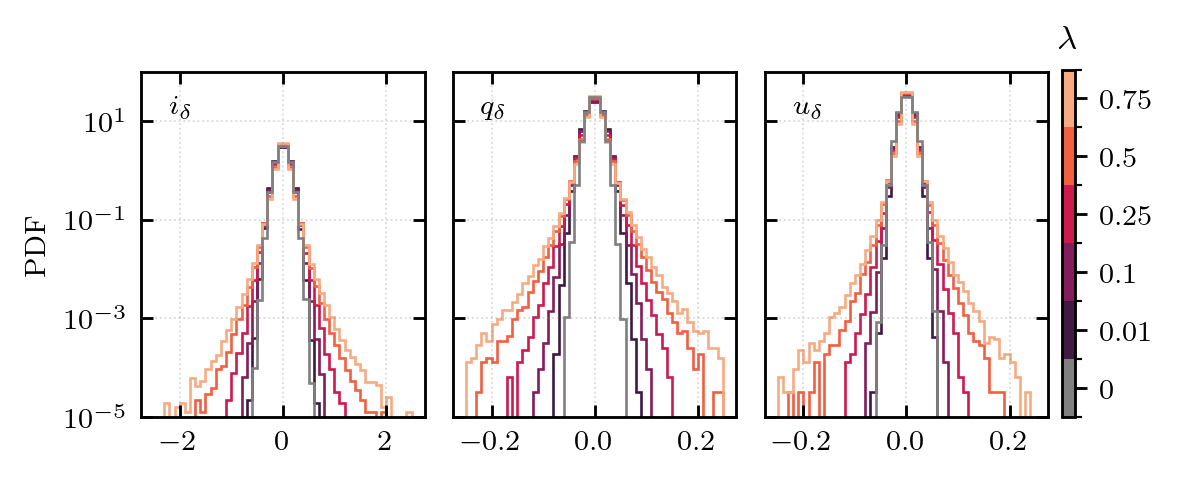

In [71]:

fig, ax = plt.subplots(1, 3, figsize=(1.75*3., 1.75), dpi=256)

cols = sns.color_palette('rocket', len(i))
for j, _i in enumerate(i):
    ax[0].stairs(*_i, edgecolor=cols[j], linewidth=0.75)
for j, _i in enumerate(q):
    ax[1].stairs(*_i, edgecolor=cols[j], linewidth=0.75)
for j, _i in enumerate(u):
    ax[2].stairs(*_i, edgecolor=cols[j], linewidth=0.75)

ax[0].stairs(*utils.make_hist(iqu11[0], density=True, bin_num=50, range=ranges[0]), edgecolor='gray', linewidth=0.75)
ax[1].stairs(*utils.make_hist(iqu11[1], density=True, bin_num=50, range=ranges[1]), edgecolor='gray', linewidth=0.75)
ax[2].stairs(*utils.make_hist(iqu11[2], density=True, bin_num=50, range=ranges[2]), edgecolor='gray', linewidth=0.75)

for axx in ax:
    pretty_axes(axx)
    axx.set_yscale('log')
    # axx.set_xscale('symlog')
    axx.set_ylim((1e-5, 1e2))
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

ax[0].text(0.1, 0.88, '$i_\delta$', transform=ax[0].transAxes)
ax[1].text(0.1, 0.88, '$q_\delta$', transform=ax[1].transAxes)
ax[2].text(0.1, 0.88, '$u_\delta$', transform=ax[2].transAxes)

ax[0].set_ylabel('PDF')

from matplotlib.colors import ListedColormap, BoundaryNorm
colours = [(0.5, 0.5, 0.5)] + cols
cmap2 = ListedColormap(colours)

bounds = np.arange(len(colours) + 1)
norm = BoundaryNorm(bounds, ncolors=len(colours))
im = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.11, 0.01, 0.775])
cbar = fig.colorbar(im, cax=cbar_ax)
centers = 0.5 + np.arange(len(colours))
cbar.set_ticks(centers)
cbar.set_ticklabels([0, 0.01, 0.1, 0.25, 0.5, 0.75])
cbar_ax.set_title(r'$\lambda$')

fig.subplots_adjust(wspace=0.1)

fig.savefig('iqu_dust_dists.png', bbox_inches='tight', pad_inches=0.1)



<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_174736/1328607247.py:23: SyntaxWarning: invalid escape sequence '\d'
  ax[0].text(0.1, 0.88, '$I_\delta$', transform=ax[0].transAxes)
/tmp/ipykernel_174736/1328607247.py:24: SyntaxWarning: invalid escape sequence '\d'
  ax[1].text(0.1, 0.88, '$Q_\delta$', transform=ax[1].transAxes)
/tmp/ipykernel_174736/1328607247.py:25: SyntaxWarning: invalid escape sequence '\d'
  ax[2].text(0.1, 0.88, '$U_\delta$', transform=ax[2].transAxes)


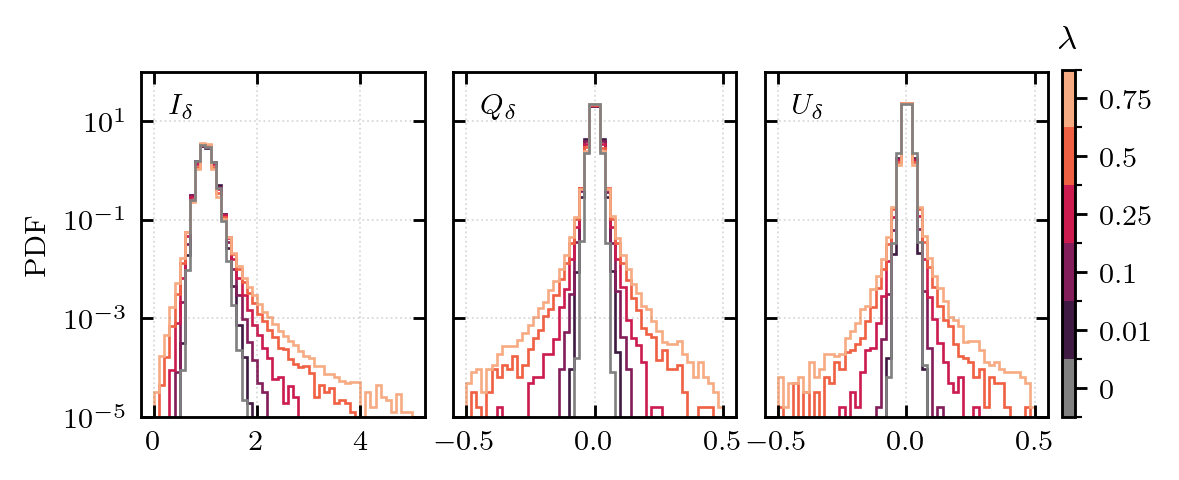

In [70]:

fig, ax = plt.subplots(1, 3, figsize=(1.75*3., 1.75), dpi=256)

cols = sns.color_palette('rocket', len(i))
for j, _i in enumerate(I):
    ax[0].stairs(*_i, edgecolor=cols[j], linewidth=0.75)
for j, _i in enumerate(Q):
    ax[1].stairs(*_i, edgecolor=cols[j], linewidth=0.75)
for j, _i in enumerate(U):
    ax[2].stairs(*_i, edgecolor=cols[j], linewidth=0.75)

ax[0].stairs(*utils.make_hist(IQU11[0], density=True, bin_num=50, range=ranges2[0]), edgecolor='gray', linewidth=0.75)
ax[1].stairs(*utils.make_hist(IQU11[1], density=True, bin_num=50, range=ranges2[1]), edgecolor='gray', linewidth=0.75)
ax[2].stairs(*utils.make_hist(IQU11[2], density=True, bin_num=50, range=ranges2[2]), edgecolor='gray', linewidth=0.75)

for axx in ax:
    pretty_axes(axx)
    axx.set_yscale('log')
    # axx.set_xscale('symlog')
    axx.set_ylim((1e-5, 1e2))
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

ax[0].text(0.1, 0.88, '$I_\delta$', transform=ax[0].transAxes)
ax[1].text(0.1, 0.88, '$Q_\delta$', transform=ax[1].transAxes)
ax[2].text(0.1, 0.88, '$U_\delta$', transform=ax[2].transAxes)

ax[0].set_ylabel('PDF')

from matplotlib.colors import ListedColormap, BoundaryNorm
colours = [(0.5, 0.5, 0.5)] + cols
cmap2 = ListedColormap(colours)

bounds = np.arange(len(colours) + 1)
norm = BoundaryNorm(bounds, ncolors=len(colours))
im = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.11, 0.01, 0.775])
cbar = fig.colorbar(im, cax=cbar_ax)
centers = 0.5 + np.arange(len(colours))
cbar.set_ticks(centers)
cbar.set_ticklabels([0, 0.01, 0.1, 0.25, 0.5, 0.75])
cbar_ax.set_title(r'$\lambda$')

fig.subplots_adjust(wspace=0.1)

fig.savefig('IQU_dust_dists.png', bbox_inches='tight', pad_inches=0.1)
